# 1. Supervised_Learning_Case_Study - 30

## Objectives:

### - Fit a model using binary classification using logistic regression.
### - Identify correlated variables and form a less complex model.


## Questions:


### 1.	Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.
[Hint: Refer to Label Encoder- one hot encoding not required  since the label column has only two values ]


### Import Librireise

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

In [2]:
os.getcwd()

'C:\\Users\\ankit\\Top_Mentor'

In [3]:
os.chdir('C:\\Users\\ankit\\OneDrive\\Documents\\Desktop\\DATA SCIENCE\\Top Mentor Lecture\\24_Day_31_7_21\\Case Studies with Answer\\CS 30 Ans -Supervised Learnig-1')

In [4]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Data Check

In [5]:
df.shape

(3168, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
df.groupby('label').size()

label
female    1584
male      1584
dtype: int64

In [10]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [11]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

### Columns List

In [12]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

### Split the data into X and y

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [14]:
print(X[0:5], ' \n')
print(y[0:5])

[[5.97809850e-02 6.42412677e-02 3.20269134e-02 1.50714886e-02
  9.01934399e-02 7.51219512e-02 1.28634618e+01 2.74402906e+02
  8.93369417e-01 4.91917766e-01 0.00000000e+00 5.97809850e-02
  8.42791064e-02 1.57016683e-02 2.75862069e-01 7.81250000e-03
  7.81250000e-03 7.81250000e-03 0.00000000e+00 0.00000000e+00]
 [6.60087404e-02 6.73100288e-02 4.02287348e-02 1.94138670e-02
  9.26661901e-02 7.32523231e-02 2.24232854e+01 6.34613855e+02
  8.92193242e-01 5.13723843e-01 0.00000000e+00 6.60087404e-02
  1.07936554e-01 1.58259149e-02 2.50000000e-01 9.01442308e-03
  7.81250000e-03 5.46875000e-02 4.68750000e-02 5.26315789e-02]
 [7.73155027e-02 8.38294209e-02 3.67184587e-02 8.70105656e-03
  1.31908017e-01 1.23206961e-01 3.07571546e+01 1.02492770e+03
  8.46389092e-01 4.78904979e-01 0.00000000e+00 7.73155027e-02
  9.87062616e-02 1.56555773e-02 2.71186441e-01 7.99005682e-03
  7.81250000e-03 1.56250000e-02 7.81250000e-03 4.65116279e-02]
 [1.51228092e-01 7.21105873e-02 1.58011187e-01 9.65817278e-02
  2.0

### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

C:\Users\ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
print(y)

[1 1 1 ... 0 0 0]


### 2.	Fit a logistic regression model and measure the accuracy on the test set. 
[Hint: Refer to Linear Models  in scikit-learn]

### Train Test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print('shape of X train {}'.format(X_train.shape), 'and', 'shape of y train {}'.format(y_train.shape))
print('shape of X test {}'.format(X_test.shape), 'and', 'sahpe of y test {}'.format(y_test.shape))

shape of X train (2534, 20) and shape of y train (2534,)
shape of X test (634, 20) and sahpe of y test (634,)


### Creat Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction with test

In [21]:
y_pred = lr.predict(X_test)
print('prediction has done')

prediction has done


### Accuracy score

In [22]:
from sklearn import metrics

In [23]:
accuracy = metrics.r2_score(y_pred, y_test)
accuracy

0.41226076555023927

### Classification Report   

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       304
           1       0.87      0.85      0.86       330

    accuracy                           0.85       634
   macro avg       0.85      0.85      0.85       634
weighted avg       0.85      0.85      0.85       634



### Confustion metrics

In [25]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_pred,y_test)
print (cm)

[[261  43]
 [ 50 280]]


### 3.	Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]



### Co relation  Matrix    

In [26]:
cor_matrix = df.corr()
print(display(cor_matrix))

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


None


### Heat Map

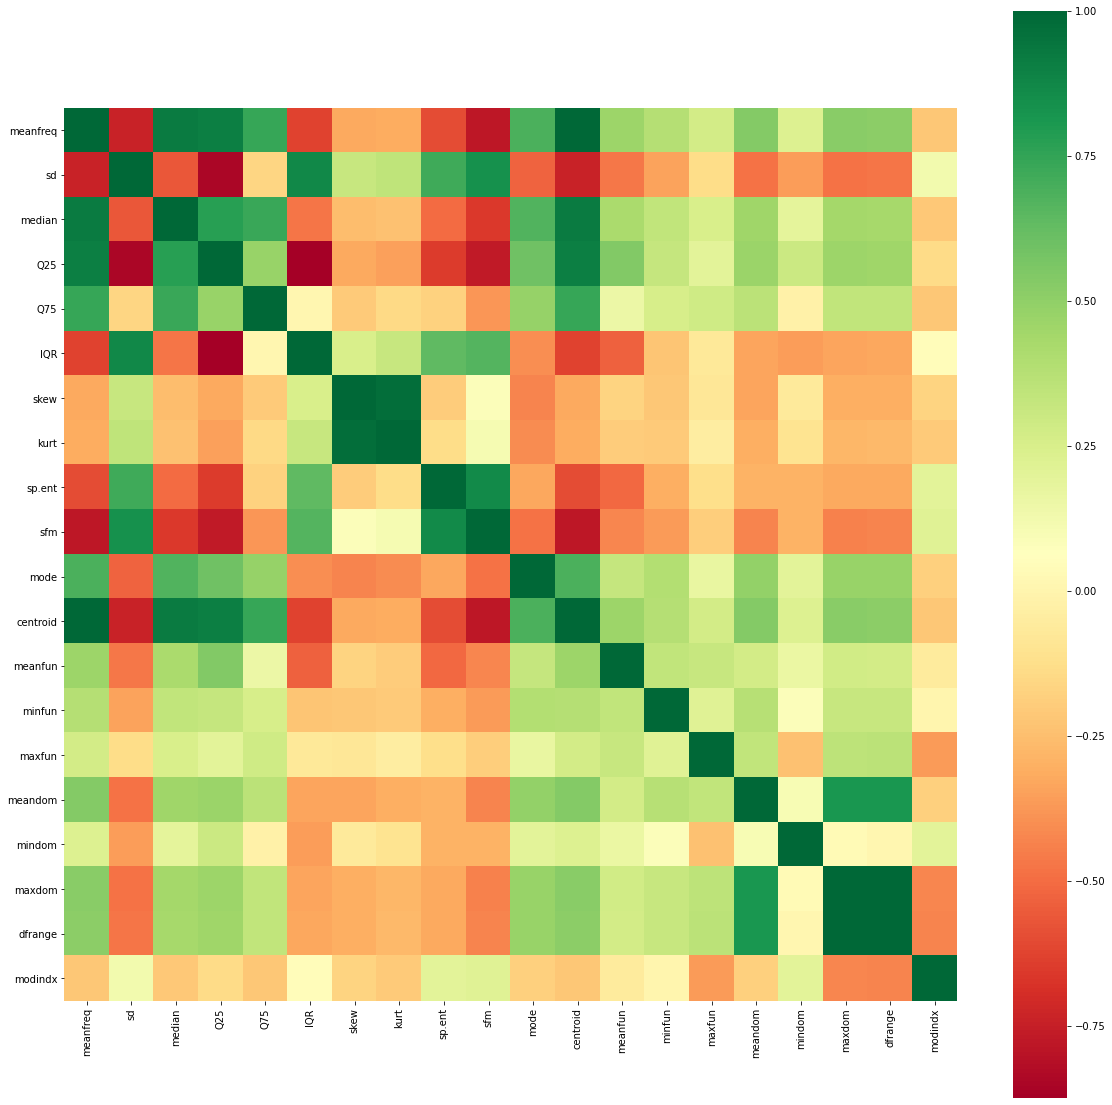

In [27]:
plt.figure(figsize = (20, 20) )
sns.heatmap(cor_matrix, square = True, cmap = plt.cm.RdYlGn)
plt.show()

### 4.	Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model. (Remove the columns with co relation above 0.7)
[Hint: Identify correlated variable pairs and remove one among them]


In [28]:
def corelation (dataset, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range (len(  corr_matrix.columns)):
        for j in range (i):
            if corr_matrix.iloc[i,j]> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

### Call the functions and identify the columns above threshold

In [29]:
cor_features = corelation(X_train, 0.75)
print(cor_features)

{'Q25', 'IQR', 'kurt', 'centroid', 'maxdom', 'sfm', 'dfrange', 'median'}


In [30]:
df = df.drop(cor_features, axis = 1)

### Create X and y

In [31]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
print(X)
print(y)

[[0.05978098 0.06424127 0.09019344 ... 0.0078125  0.0078125  0.        ]
 [0.06600874 0.06731003 0.09266619 ... 0.00901442 0.0078125  0.05263158]
 [0.0773155  0.08382942 0.13190802 ... 0.00799006 0.0078125  0.04651163]
 ...
 [0.14205626 0.09579843 0.22436026 ... 0.49427083 0.0078125  0.19475862]
 [0.14365874 0.09062826 0.2199428  ... 0.79136029 0.0078125  0.31100218]
 [0.16550895 0.09288354 0.25082737 ... 0.22702206 0.0078125  0.35      ]]
['male' 'male' 'male' ... 'female' 'female' 'female']


In [39]:
y = encoder.fit_transform(y)
print(y)

[1 1 1 ... 0 0 0]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print('shape of X train {}'.format(X_train.shape), 'and', 'shape of y train {}'.format(y_train.shape))
print('shape of X test {}'.format(X_test.shape), 'and', 'sahpe of y test {}'.format(y_test.shape))

shape of X train (2534, 12) and shape of y train (2534,)
shape of X test (634, 12) and sahpe of y test (634,)


### Creat Model

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [45]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,

### Accuracy Score

In [46]:
accuracy = metrics.r2_score(y_pred, y_test)
accuracy

0.5970338983050847

### Classifiction Report

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       280
           1       0.95      0.87      0.91       354

    accuracy                           0.90       634
   macro avg       0.90      0.91      0.90       634
weighted avg       0.91      0.90      0.90       634



### Confusion Metrix

In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[264  16]
 [ 47 307]]
